# Working With Consumer Reports Computer Spec Data in Python

Specs table as input to this workbook was transformed with R scripts first

In [1]:
## Libraries needed
import pandas as pd
import numpy as np

In [3]:
!ls *.csv

cr_reviewPageURLs_AllComputers.csv cr_reviewsPage_recs_w_Rvws.csv
cr_reviewsPage_PriceInfo.csv       cr_specsForProds_long.csv
cr_reviewsPage_recs_w_NoRvws.csv   cr_specsForProds_wide.csv


In [4]:
# get spec sheet from modifications made in R
cr_specs_csv = "./cr_specsForProds_wide.csv"
naList = ["", " ", "  ", "?"]
cr_spec_df = pd.read_csv(cr_specs_csv, na_values=naList)
cr_spec_df.head()

,Unnamed: 0,brand,model,prod_class,url,Analog_surround_sound_out,Battery_capacity,Blu_ray_or_DVD,Blu_ray_reader,Built_in_microphone,...,Voice_command,Warranty_length,Width,WiFi,WiFi_type,Wireless_keyboard,Wireless_mouse,xD_reader,Has_Facial_recognition,Has_FingerPrintReader
0,1,Acer,Aspire E5-574-53QS computer,laptop,https://www.consumerreports.org/products/lapto...,NaN,37.0,D,NaN,NaN,...,NaN,12,15.0,NaN,802.11ac,NaN,NaN,NaN,0,0
1,2,Acer,Aspire E5-575T-3678 computer,laptop,https://www.consumerreports.org/products/lapto...,NaN,41.0,D,NaN,NaN,...,NaN,12,15.0,NaN,802.11ac,NaN,NaN,NaN,0,0
2,3,Acer,Aspire ES 15 E5-573-35JA computer,laptop,https://www.consumerreports.org/products/lapto...,NaN,37.0,D,NaN,NaN,...,NaN,12,15.0,NaN,802.11ac,NaN,NaN,NaN,0,0
3,4,Acer,Aspire ES1-533-C55P computer,laptop,https://www.consumerreports.org/products/lapto...,NaN,37.0,None,NaN,NaN,...,NaN,12,15.1,NaN,802.11ac,NaN,NaN,NaN,0,0
4,5,Acer,Aspire ES1-571-P1MG computer,laptop,https://www.consumerreports.org/products/lapto...,NaN,38.0,D,NaN,NaN,...,NaN,12,15.1,NaN,802.11ac,NaN,NaN,NaN,0,0


In [5]:
# quick check of the head of this worksheet is above
print(len(cr_spec_df))  
cr_spec_df.shape

268


(268, 59)

In [6]:
%matplotlib inline

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## New Features and Standards

Among the spec fields collected on the site, there were some fields that clearly represent features and/or standards that are new or are still new enough that we don't expect to see them in all the equipment being analyzed.  For comparison, consumer reports was able to obtain this many models for review segregated by brand.

### Models Reviewed For Each Brand

In [8]:
## quick list of the data:
cr_spec_df.groupby('brand')['model'].count().sort_values(ascending=False)

brand
HP           62
Lenovo       48
Dell         41
Acer         30
Asus         24
Apple        20
Samsung      17
Microsoft     8
LG            6
Vaio          4
Toshiba       4
Intel         2
Huawei        1
Google        1
Name: model, dtype: int64

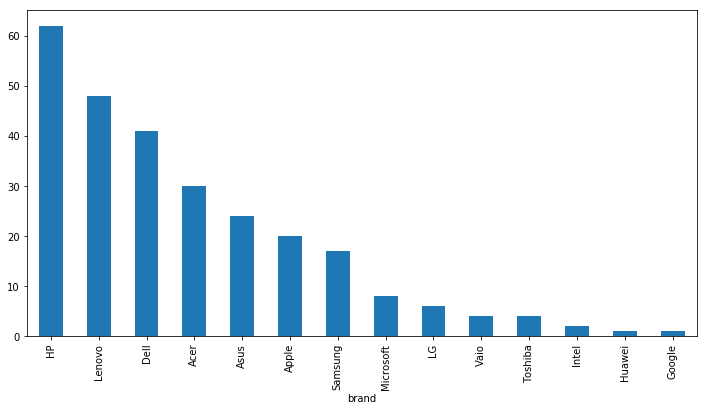

In [9]:
# in graphical form

plt.figure(figsize=(12,6))
cr_spec_df.groupby('brand')['model'].count().sort_values(ascending=False).plot.bar()

### Facial Recognition

Models tested that had Facial Recognition:

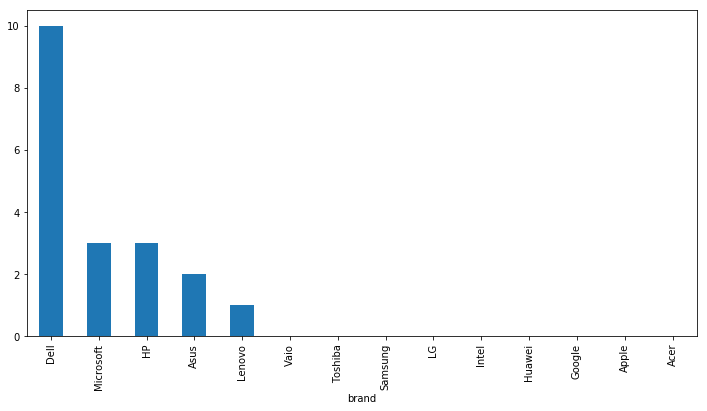

In [10]:
plt.figure(figsize=(12,6))
cr_spec_df.groupby('brand')['Has_Facial_recognition'].sum().sort_values(ascending=False).plot.bar()

### Use Finger Print Sign-In
This feature is more common on smart phones but is making its way to computers.

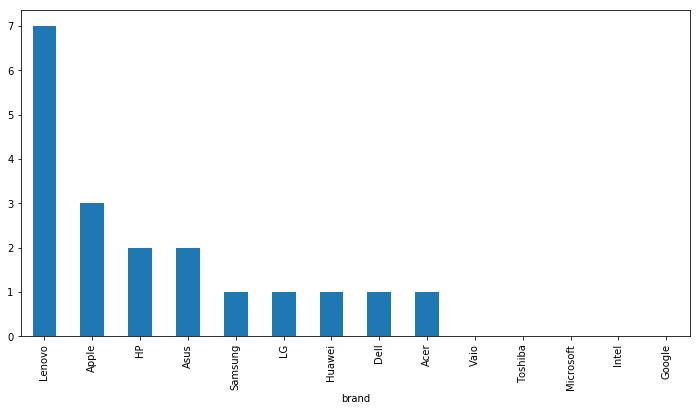

In [11]:
plt.figure(figsize=(12,6))
cr_spec_df.groupby('brand')['Has_FingerPrintReader'].sum().sort_values(ascending=False).plot.bar()

**Point of interest taking these two graphs together:**

1. HP, Lenovo, Asus, and Dell - offer different models with either facial recongition or fingerprint readers
2. Microsoft and Apple are split:
  - Apple offerings that were tested sported fingerprint readers only
  - Microsoft offerings included facial recognition only
3. Vaio / Toshiba did not have this feature in any of the models tested by CR
4. More of the players offer finger print readers at this time than facial recognition

### Has Thunderbolt Ports

It is known going into this analysis that Apple has made a commitment in new laptops this year to provide Thunderbolt ports only while HP, recognizing that if the new standard is adopted to replace USB, users still need to transition, so they have released laptops on the market with both types of ports.  That said, data on models tested by Consumer Reports for how many models included Thunderbolt = "Yes" as a spec is provided here.

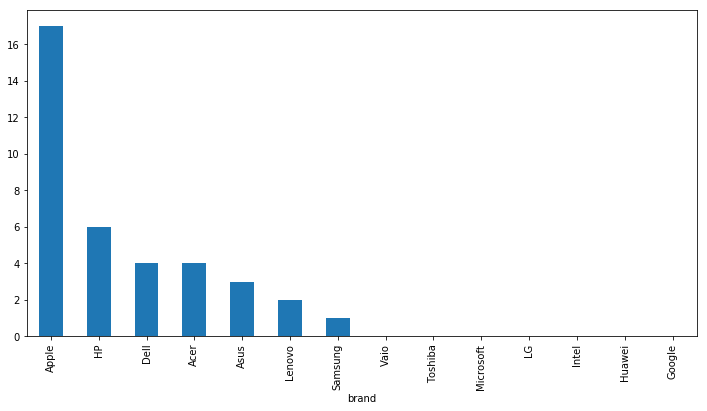

In [12]:
plt.figure(figsize=(12,6))
cr_spec_df.groupby('brand')['Thunderbolt_port'].sum().sort_values(ascending=False).plot.bar()

Of interest:  Microsoft computers that were tested were not recorded as offering this standard even as an option yet.  But some major players in the windows space (Lenovo, Acer, Asus) all had at least a few models to try it out.  My anecdotal knowledge of HP's use of both ports in their machines is reflected in only 6 of the models tested by CR.

### Gigabit Ethernet Port

When these first started showing up in laptops in particular, they were seen as a feature needed more for "jacking into the network at work" then for home use.  With the rise of high speed internet, this feature is probably a must now.  The point of interest here is what companies are leaving this off of any of their models.  Though wifi could theoretically supplant the need, the standard way to troubleshoot a bad internet connection is to jack the computer directly into the router and see what is going on.

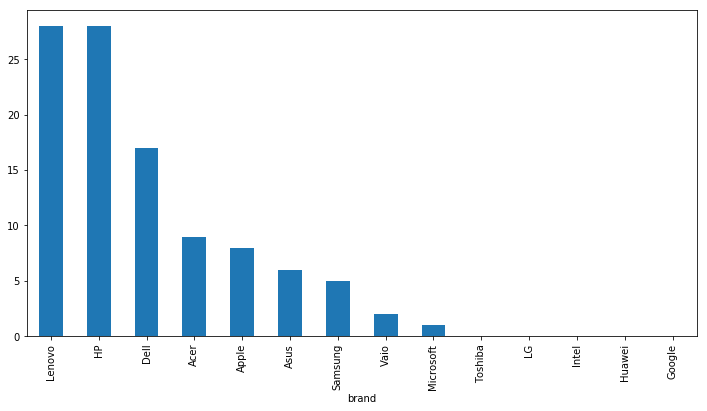

In [13]:
# Gigabit_Ethernet
plt.figure(figsize=(12,6))
cr_spec_df.groupby('brand')['Gigabit_Ethernet'].sum().sort_values(ascending=False).plot.bar()

### WIFI

There are often [new standards of WiFi](https://www.forbes.com/sites/gordonkelly/2014/12/30/802-11ac-vs-802-11n-wifi-whats-the-difference/#5a441ea53957) coming out with differing levels of support and adoption for each.  Cleansing of the Wifi field was put off (in favor of other analysis) when it was realized that the field had over 94 missing values.  These values included Chromebooks which definitely use wifi being that they are designed for the cloud.  As a point of interest though, here are the counts on different kinds of wifi found in tested models (where the spec is known):

In [14]:
cr_spec_df.WiFi_type.value_counts()

802.11ac             150
802.11n               21
802.11n Dual-band      3
Name: WiFi_type, dtype: int64

In [15]:
## and segmenting this by brand (for what's known):
cr_spec_df.groupby('brand').WiFi_type.value_counts()

brand      WiFi_type        
Acer       802.11ac             20
           802.11n               1
Apple      802.11ac             12
Asus       802.11ac             11
           802.11n               2
           802.11n Dual-band     2
Dell       802.11ac             18
           802.11n               4
HP         802.11ac             23
           802.11n              12
Huawei     802.11ac              1
LG         802.11ac              6
Lenovo     802.11ac             33
           802.11n               2
Microsoft  802.11ac              7
Samsung    802.11ac             13
Toshiba    802.11ac              2
           802.11n Dual-band     1
Vaio       802.11ac              4
Name: WiFi_type, dtype: int64

## Some Other Points of Interest

### Memory by Manufacturer

How much RAM (Random Access Memory) are different manufacturers putting in their computer models?  We can also get a sense of the overall distribution within the computer models from these box plots.

In [46]:
import seaborn as sns
from matplotlib import pyplot

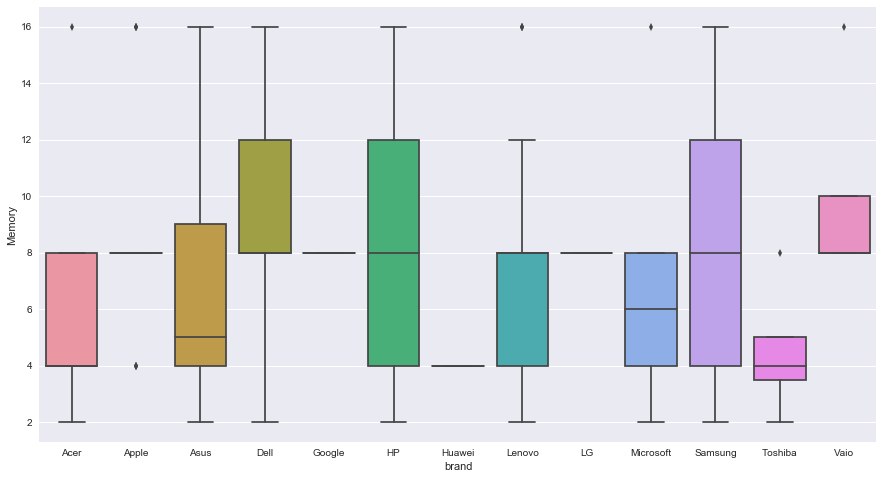

In [42]:
plt.figure(figsize=(15,8))
sns.boxplot(x='brand', y='Memory', data=cr_spec_df)

From this we see that Samsung and HP have the widest offerings of Memory within the models they release and 
the Google Chromebook (a cloud computing option) sits squarely in the middle of these offerings at 8 GB of Memory.
The data currently on the site would have you believing that most Apple offerings are 8 GB with a few outliers at 4
and 16.  Dell markets most, if not all of their computers in the general top range of 8 to 12 
(precluding the 16 GB outliers) and Toshiba seems to pack less memory in most of their models with a high general range that looks like 5 GB with a mean of 4 and an outlier (or a few outliers) at around 8 GB.

Note the following overall memory pattern as opposed to the above:

In [18]:
cr_spec_df.Memory.value_counts()

8     119
4      65
16     28
2      25
12     22
6       9
Name: Memory, dtype: int64

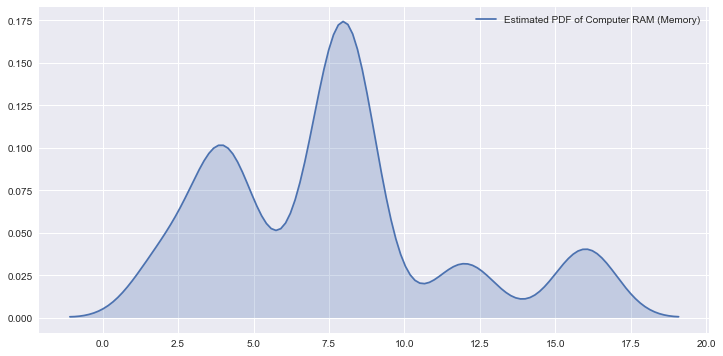

In [43]:
plt.figure(figsize=(12,6))
sns.kdeplot(cr_spec_df['Memory'], shade=True, label='Estimated PDF of Computer RAM (Memory)') 
# kernel density plot

Note that there were no missing values in the Memory field, and according to these stats created in R, the min/max range of the data is 2GB to 16 GB. But the biggest spikes in the data are at around 4 and 8 GB which do feel accurate for the current state of the market.  The data shows 4 hills and it should be noted that the density plot seems to estimate a range for drawing the curve that is larger than the actual data.  Note the max/min values from this summary of the field lifted from R Studio:

    Memory       
 Min.   : 2.000       
 1st Qu.: 4.000       
 Median : 8.000    
 Mean   : 7.567      
 3rd Qu.: 8.000   
 Max.   :16.000

On a related note: there is a field in the specifications with the title: "Suitable_for_gaming".  The field has 204 missing values.  Included in these values are laptop and desktop with well known graphics cards.  The video memory tends to be on the low end and might be a little light for gaming, but it should have been possible to test them. Thinking about systems put out by Alienware for "Super Users" and  "Gamers" and also looking at the price of such machines, it does not look like this field is truly being used or like Consumer Reports is evaluating "Gaming Computer Systems" just yet.

### Memory Versus Price - Preparations

Looking simply at Memory versus mprice, we need to combine some different sheets collected during our scraping process.  This resulted in need to do a little data cleaning as well.  Cells in this section may behave differently if run again due to data updates made since creating this section.

In [20]:
cr_Pricespecs_df = pd.read_csv("./cr_reviewsPage_PriceInfo.csv", na_values=naList)
cr_Pricespecs_df.head()

,Unnamed: 0,X,index,prod_class,brand,product_title,price,url,url2
0,1,0,0,laptop,Acer,Aspire E5-574-53QS,390.0,http://www.consumerreports.org/products/laptop...,https://www.consumerreports.org/products/lapto...
1,2,1,1,laptop,Acer,Aspire ES1-571-P1MG,315.0,http://www.consumerreports.org/products/laptop...,https://www.consumerreports.org/products/lapto...
2,3,2,2,laptop,Acer,Aspire One Cloudbook AO1-131-C9PM,165.0,http://www.consumerreports.org/products/laptop...,https://www.consumerreports.org/products/lapto...
3,4,3,3,laptop,Acer,Aspire R5-571T-57Z0,700.0,http://www.consumerreports.org/products/laptop...,https://www.consumerreports.org/products/lapto...
4,5,4,4,laptop,Acer,Aspire R7-372T-54TM,900.0,http://www.consumerreports.org/products/laptop...,https://www.consumerreports.org/products/lapto...


In [22]:
# cr_Pricespecs_df.corr
#   .loc['prod_class', 'brand', 'product_title', 'price']
memoryPrice = cr_spec_df[['prod_class','brand', 'model', 'Memory', 'url']].merge(
    cr_Pricespecs_df[['price', 'url2']], how='left',
    left_on=['url'], 
    right_on=['url2'])
print(memoryPrice.shape)
memoryPrice[np.isnan(memoryPrice['price'])]

(358, 7)


,prod_class,brand,model,Memory,url,price,url2
244,desktop-computer,Intel,Compute Stick 2nd Gen computer,2,https://www.consumerreports.org/products/deskt...,NaN,NaN
245,desktop-computer,Intel,Compute Stick computer,2,https://www.consumerreports.org/products/deskt...,NaN,NaN


In [23]:
## computer sticks were clened from price table and must have forgot to remove them from spec table
## removing them here:
memoryPrice.drop(memoryPrice.index[[244,245]], inplace=True)
memoryPrice.shape

(356, 7)

In [24]:
# remove from source too ...
# prove we have the right pattern before removing them:
cr_spec_df[cr_spec_df['model'].str.contains("Compute Stick")==True]

,Unnamed: 0,brand,model,prod_class,url,Analog_surround_sound_out,Battery_capacity,Blu_ray_or_DVD,Blu_ray_reader,Built_in_microphone,...,Voice_command,Warranty_length,Width,WiFi,WiFi_type,Wireless_keyboard,Wireless_mouse,xD_reader,Has_Facial_recognition,Has_FingerPrintReader
179,180,Intel,Compute Stick 2nd Gen computer,desktop-computer,https://www.consumerreports.org/products/deskt...,No,NaN,NaN,No,NaN,...,No,12,1.5,Yes,NaN,NaN,NaN,No,0,0
180,181,Intel,Compute Stick computer,desktop-computer,https://www.consumerreports.org/products/deskt...,No,NaN,NaN,No,NaN,...,No,12,1.5,Yes,NaN,NaN,NaN,No,0,0


In [29]:
## don't need url ... but may need url2 if joining this to something else later
del memoryPrice['url']

In [25]:
## now drop them and resave the results so our fixed data is preserved
print(cr_spec_df.shape)
cr_spec_df.drop(cr_spec_df.index[[179, 180]], inplace=True)
print(cr_spec_df.shape)  # 2 records to drop

(268, 59)
(266, 59)


In [50]:
cr_spec_df.to_csv('./cr_reviewsPage_PriceInfo2.csv')

### Memory Vs. Price

How much more do computer makers charge for including more memory?  Salesmen would have your believe it is just another \$25 to \$50 more but when you look at prices it is hard to tell since generally, the increased memory is part of a "bundle" of increased specs in an overall better machine.  Anecdotally, Prices are often upwards of $200 different between say the 8GB and 16GB model when you go to the store. But let's look at the data from reviews on Consumer Reports or this ...

In [33]:
## quick look at memoryPrice DF created earlier:
memoryPrice.head()

,prod_class,brand,model,Memory,price,url2
0,laptop,Acer,Aspire E5-574-53QS computer,4,390.0,https://www.consumerreports.org/products/lapto...
1,laptop,Acer,Aspire E5-574-53QS computer,4,390.0,https://www.consumerreports.org/products/lapto...
2,laptop,Acer,Aspire E5-575T-3678 computer,8,400.0,https://www.consumerreports.org/products/lapto...
3,laptop,Acer,Aspire E5-575T-3678 computer,8,400.0,https://www.consumerreports.org/products/lapto...
4,laptop,Acer,Aspire ES 15 E5-573-35JA computer,4,250.0,https://www.consumerreports.org/products/lapto...


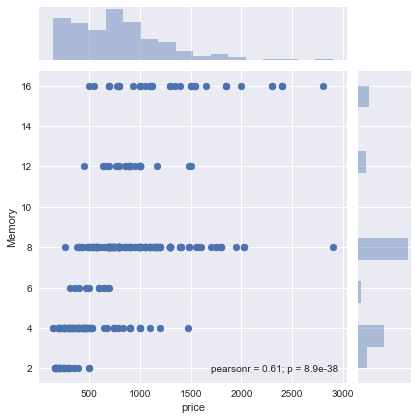

In [49]:
# plt.figure(figsize=(12,6))  size does not seem to impact this one ...
# fig, ax = pyplot.subplots(figsize=(12,12))  # needs import pyplot from matplotlib - and did not work
fig.set_size_inches(12.7, 9.27)               # no effect
sns.jointplot(memoryPrice['price'], memoryPrice['Memory'])  # bivariate analysis: x= Price, y=Memory

We have a very small p-value and a pearson correlation of .61.  The correlation between price and Memory is significant, but this plot also suggests that other factors are involved besides just price.  We can reason this out ourselves without even needing the data, but from a data perspective, note the "stripes" of how price points are spread out in a range from high to low values for every level of RAM.  To exhibit a pattern like this and yet still be statistically significant, there must be other factors driving why two machines of say 8 GB of RAM can have such different price levels.  

This is more a sanity check that our data analysis techniques are working, than anything surprising in terms of revelation.  Anyone with knowledge of PCs would expect these results.  The data simply confirms it.

In [2]:
print("End")

End
